In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from supervised.automl import AutoML # mljar-supervised

# Load the data with BASE.csv using pandas
data = pd.read_csv('BASE.csv', header=0, parse_dates=True, index_col=0, dayfirst=True)
#Use data index < 2021-09-01 00:00:00
data = data.loc[data.index < '2020-09-01 00:00:00']

#Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    pd.DataFrame(data, columns=data.columns), data['Energia GBA'], test_size=0.1, random_state=42)
data.tail()


,Hora,Tipo Dia,Energia BSAS,Clima BSAS,Energia GBA,Clima GBA,Año,Mes
Fecha,,,,,,,,
2020-08-31 19:00:00,19,2,1965.710,11.7,7383.464,11.7,2020,8
2020-08-31 20:00:00,20,2,2110.134,11.1,8126.400,11.1,2020,8
2020-08-31 21:00:00,21,2,2145.905,10.9,8483.626,10.9,2020,8
2020-08-31 22:00:00,22,2,2090.346,10.4,8430.192,10.4,2020,8
2020-08-31 23:00:00,23,2,2005.666,10.1,8085.246,10.1,2020,8


Linear algorithm was disabled.
AutoML directory: AutoML_4
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 5 models
1_Default_LightGBM rmse 15.393928 trained in 166.98 seconds (1-sample predict time 0.1094 seconds)
2_Default_Xgboost rmse 9.53626 trained in 14.32 seconds (1-sample predict time 0.106 seconds)
3_Default_CatBoost rmse 11.297332 trained in 42.62 seconds (1-sample predict time 0.0621 seconds)
4_Default_NeuralNetwork rmse 7.225865 trained in 6.6 seconds (1-sample predict time 0.0625 seconds)
5_Default_RandomForest rmse 75.260835 trained in 21.

KeyboardInterrupt: 

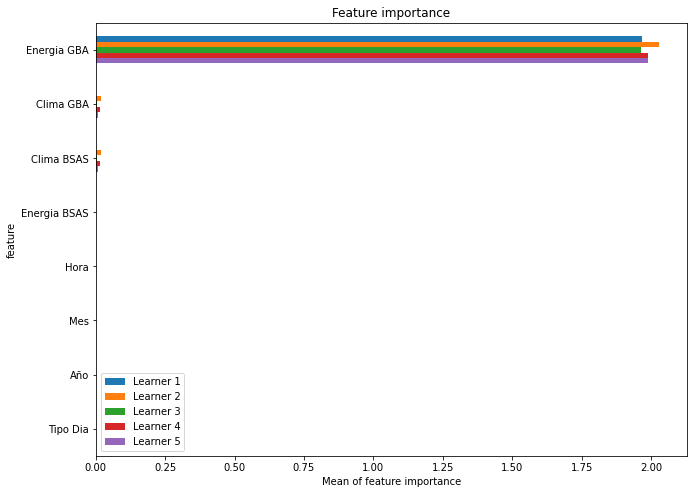

In [38]:
# train models with AutoML
automl = AutoML(mode="Perform")
automl.fit(X_train, y_train)

# compute the MSE on test data
predictions = automl.predict_all(X_test)
print("Test MSE:", mean_squared_error(y_test, predictions))

In [36]:
predictions.head()

,prediction
0,6136.974008
1,4440.298425
2,3701.410650
3,6731.184413
4,7793.709637


In [37]:
#Export the predictions to a csv file
predictions.to_csv('predictions.csv')